# HOUSING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option("display.max_columns", None)
df = pd.read_csv("housing.csv")
df.head(6)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


In [2]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [3]:
df.drop(columns = "total_bedrooms")

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
df.dtypes == "O"

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity        True
dtype: bool

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

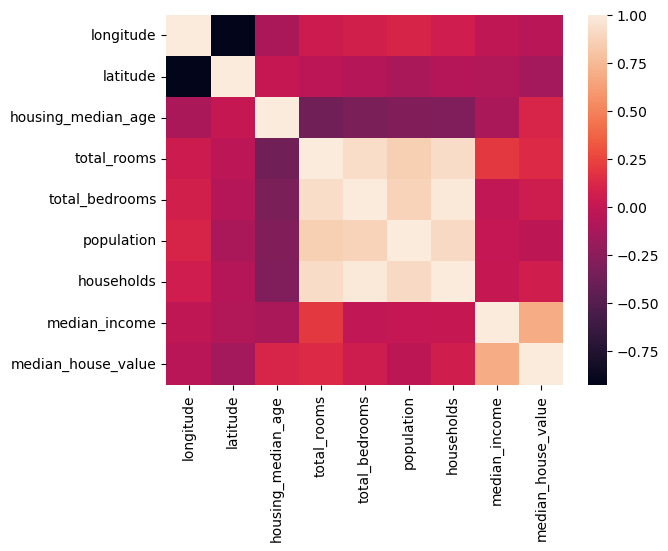

In [7]:
sns.heatmap(df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]].corr())

<Axes: >

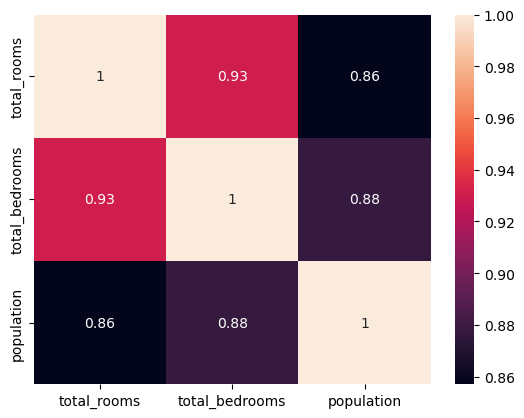

In [8]:
sns.heatmap(df[["total_rooms","total_bedrooms","population"]].corr(),annot = True)

## What is the average bedroom count for each ocean proximity

In [9]:
df.groupby(by = "ocean_proximity")["total_bedrooms"].mean()

ocean_proximity
<1H OCEAN     546.539185
INLAND        533.881619
ISLAND        420.400000
NEAR BAY      514.182819
NEAR OCEAN    538.615677
Name: total_bedrooms, dtype: float64

## Hoe does ocean proximity relate to number of households

<Axes: xlabel='ocean_proximity'>

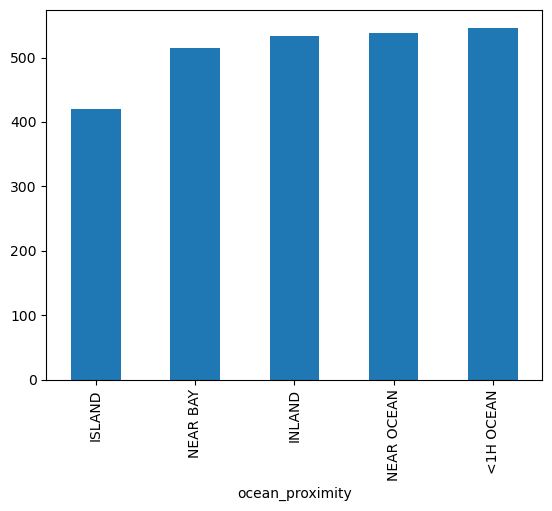

In [10]:
df.groupby(by = "ocean_proximity")["total_bedrooms"].mean().sort_values().plot(kind="bar")

## What is the average values of each house in different area

In [11]:
df.groupby(by = "ocean_proximity")["median_house_value"].mean()

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

In [12]:
df.groupby(by = "ocean_proximity")[["median_house_value","total_bedrooms"]].mean()

,median_house_value,total_bedrooms
ocean_proximity,,
<1H OCEAN,240084.285464,546.539185
INLAND,124805.392001,533.881619
ISLAND,380440.000000,420.400000
NEAR BAY,259212.311790,514.182819
NEAR OCEAN,249433.977427,538.615677


## Assignemt
- Plot the longitude and latitude on a map

In [13]:
! pip install geopandas --quiet
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [14]:
geo_coordinates = df[["longitude","latitude"]]
geo_coordinates.head(6)

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85
5,-122.25,37.85


In [15]:
geo_point = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))
geo_point.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,geometry
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,POINT (-122.23000 37.88000)
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,POINT (-122.22000 37.86000)
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,POINT (-122.24000 37.85000)
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,POINT (-122.25000 37.85000)
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,POINT (-122.25000 37.85000)


In [16]:
world_data = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

C:\Users\USER\AppData\Local\Temp\ipykernel_14692\2504851905.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


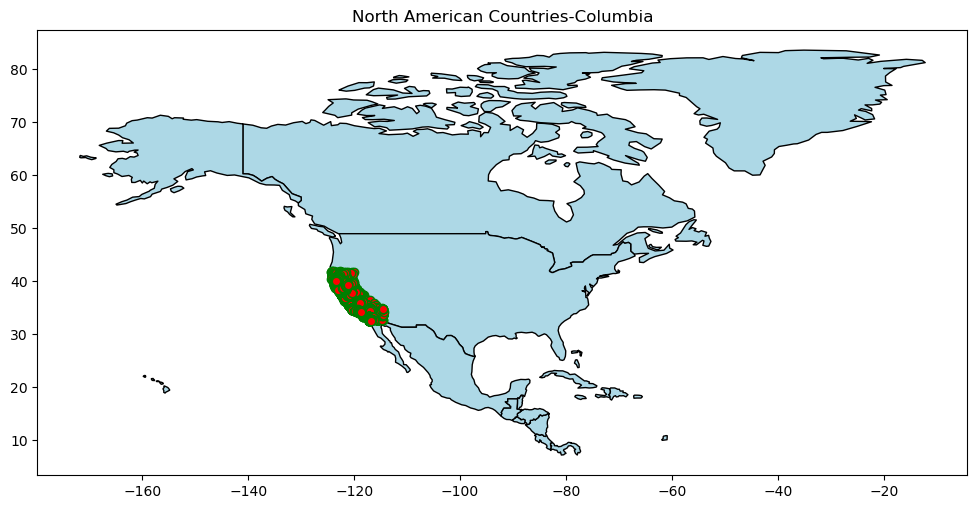

In [19]:
axis = world_data[world_data.continent == "North America"].plot(color = "lightblue",edgecolor = "black")
geo_point.plot(ax = axis, color = "red",edgecolor = "green")
plt.title("North American Countries-Columbia")
matplotlib.pyplot.gcf().set_size_inches(12,9)
plt.show()